In [1]:
%reset -f # reset notebook memory

import numpy as np
import mne
import pickle
import joblib

## less verbose output
import logging, sys
logging.disable(sys.maxsize)

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  reset, please run `%reset?` for details
Don't know how to reset  notebook, please run `%reset?` for details
Don't know how to reset  memory, please run `%reset?` for details


In [2]:
folderpath_output = 'C:\AnatArzData\Data'
filename_evoked = 'subs_evoked_5sub_reref_mneRerefAverage'
filename_epochs = 'subs_epochs_5sub_reref_mneRerefAverage'

In [3]:
alldata_evoked = joblib.load(f"{folderpath_output}\\{filename_evoked}")
alldata_epoches = joblib.load(f"{folderpath_output}\\{filename_epochs}")

f = open(f'{folderpath_output}\\{filename_epochs}_vars.pkl', 'rb')
subs, toneHieghts, toneTypes, sleepstages,wakestages,trialNums, electrodes  = pickle.load(f)
f.close()

SoVs = np.concatenate((sleepstages,wakestages))

In [4]:
def plot_(dict,title='', channles_names=''):
    cmap = 'cool'           # more color options: https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
    mne.viz.plot_compare_evokeds(dict, cmap=cmap,
                                 truncate_xaxis=False, truncate_yaxis=False, split_legend=True, #show_legend='upper left',
                                 show_sensors='upper right', show=True,
                                 title= f"{title}\n Channels: {channles_names}",)

C:\Users\Sharon\anaconda3\Lib\site-packages\mne\viz\evoked.py:1777: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ColorbarBase(cax, cmap=cmap, norm=None, orientation='vertical')


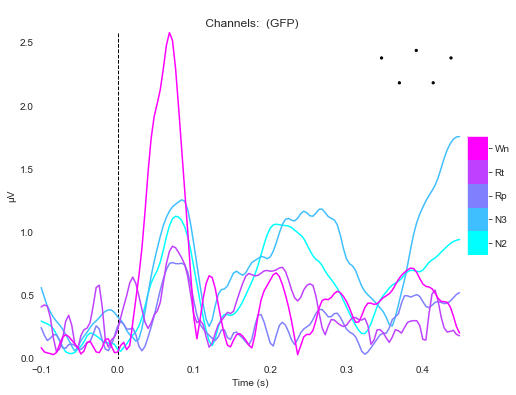

In [5]:
## get specific epochs to plot sleep stage, with errors for subject

curr_sov = SoVs
sovs_evoked_dict = {}
for ss_i, ss in enumerate(curr_sov):
    curr_sov = []
    for sub_i, sub in enumerate(subs):
        curr_sub = []
        for toneHi_i, toneHi in enumerate(toneHieghts):
            for toneTy_i, toneTy in enumerate(toneTypes):
                for trial_i, trial in enumerate(trialNums):
                    try:
                        trial_name = f"s{sub}_{ss}{toneTy}{toneHi}_{trial}"
                        curr_sub.append(alldata_evoked[trial_name])
                    except KeyError:
                        continue
        if not curr_sub == []:
            average_sub_evoked = mne.grand_average(curr_sub)
            curr_sov.append(average_sub_evoked)
    sovs_evoked_dict[ss] = curr_sov
plot_(sovs_evoked_dict)

C:\Users\Sharon\anaconda3\Lib\site-packages\mne\viz\evoked.py:1777: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ColorbarBase(cax, cmap=cmap, norm=None, orientation='vertical')


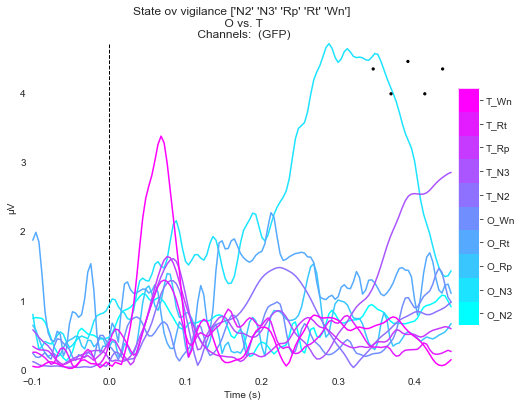

In [6]:
## get erp of two trial type for each SoV
curr_SoVs = SoVs
curr_toneType1 = 'O'
curr_toneType2 = 'T'

types_evoked_dict = {}
for toneTy_i, toneTy in enumerate([curr_toneType1,curr_toneType2]): ## notice here "curr_toneTypes = ['O','T']"
    for ss_i, sv in enumerate(curr_SoVs):
        curr_tonetypeSov = []
        for sub_i, sub in enumerate(subs):
            curr_sub = []
            for toneHi_i, toneHi in enumerate(toneHieghts):
                for trial_i, trial in enumerate(trialNums):
                    try:
                        trial_name = f"s{sub}_{sv}{toneTy}{toneHi}_{trial}"
                        curr_sub.append(alldata_evoked[trial_name])
                    except KeyError:
                        continue
            if not curr_sub == []:
                average_sub_evoked = mne.grand_average(curr_sub)
                curr_tonetypeSov.append(average_sub_evoked)
        types_evoked_dict[f'{toneTy}_{sv}'] = curr_tonetypeSov
plot_(types_evoked_dict, f'State ov vigilance {curr_SoVs}\n {curr_toneType1} vs. {curr_toneType2}')

C:\Users\Sharon\anaconda3\Lib\site-packages\mne\viz\evoked.py:1777: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ColorbarBase(cax, cmap=cmap, norm=None, orientation='vertical')


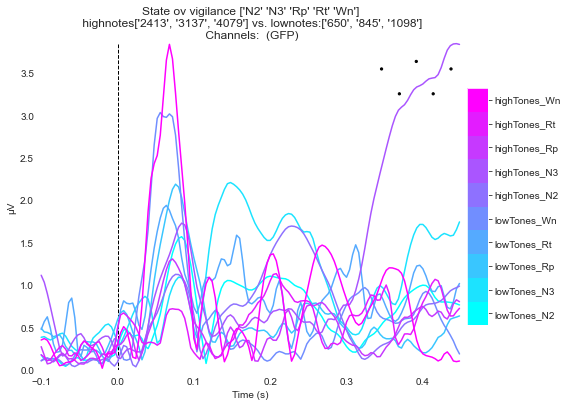

In [7]:
# low vs high tonehight in each Sov
curr_lowNotes = toneHieghts[0:3]
curr_highNotes = toneHieghts[-4:-1]
curr_SoVs = SoVs

highlow_sov_evoked_dict = {}

######## for low notes
for ss_i, sv in enumerate(curr_SoVs):
    curr_Sov = []
    for sub_i, sub in enumerate(subs):
        curr_sub = []
        for toneHi_i, toneHi in enumerate(curr_lowNotes):
            for trial_i, trial in enumerate(trialNums):
                try:
                    trial_name = f"s{sub}_{sv}{toneTy}{toneHi}_{trial}"
                    curr_sub.append(alldata_evoked[trial_name])
                except KeyError:
                    continue
        if not curr_sub == []:
            average_sub_evoked = mne.grand_average(curr_sub)
            curr_Sov.append(average_sub_evoked)
    highlow_sov_evoked_dict[f'lowTones_{sv}'] = curr_Sov

######## for high notes
for ss_i, sv in enumerate(curr_SoVs):
    curr_Sov = []
    for sub_i, sub in enumerate(subs):
        curr_sub = []
        for toneHi_i, toneHi in enumerate(curr_highNotes):
            for trial_i, trial in enumerate(trialNums):
                try:
                    trial_name = f"s{sub}_{sv}{toneTy}{toneHi}_{trial}"
                    curr_sub.append(alldata_evoked[trial_name])
                except KeyError:
                    continue
        if not curr_sub == []:
            average_sub_evoked = mne.grand_average(curr_sub)
            curr_Sov.append(average_sub_evoked)
    highlow_sov_evoked_dict[f'highTones_{sv}'] = curr_Sov

##### plot together
plot_(highlow_sov_evoked_dict, f'State ov vigilance {curr_SoVs}\n highnotes{curr_highNotes} vs. lownotes:{curr_lowNotes}')

C:\Users\Sharon\anaconda3\Lib\site-packages\mne\viz\evoked.py:1777: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ColorbarBase(cax, cmap=cmap, norm=None, orientation='vertical')


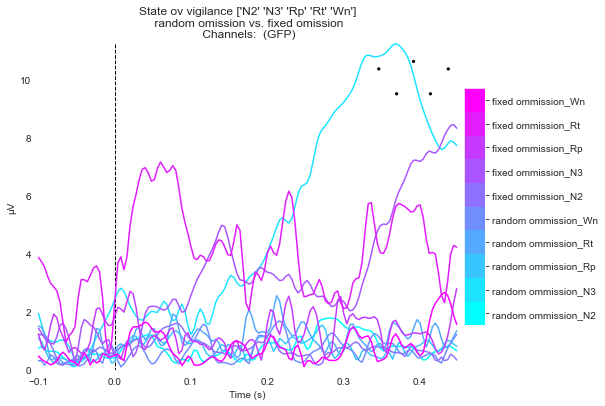

In [8]:
# random vs fixed omission in each Sov
curr_randomOTrials = ['7','8','9']
curr_fixedOTrials = ['6']
curr_toneTypes = ['O']
curr_SoVs = SoVs

randomFixed_sov_evoked_dict = {}

######## for random
for ss_i, sv in enumerate(curr_SoVs):
    curr_Sov = []
    for sub_i, sub in enumerate(subs):
        curr_sub = []
        for toneHi_i, toneHi in enumerate(toneHieghts):
            for toneTy_i, toneTy in enumerate(curr_toneTypes):
                for trial_i, trial in enumerate(curr_randomOTrials):
                    try:
                        trial_name = f"s{sub}_{sv}{toneTy}{toneHi}_{trial}"
                        curr_sub.append(alldata_evoked[trial_name])
                    except KeyError:
                        continue
        if not curr_sub == []:
            average_sub_evoked = mne.grand_average(curr_sub)
            curr_Sov.append(average_sub_evoked)
    randomFixed_sov_evoked_dict[f'random ommission_{sv}'] = curr_Sov

######## for fixed
for ss_i, sv in enumerate(curr_SoVs):
    curr_Sov = []
    for sub_i, sub in enumerate(subs):
        curr_sub = []
        for toneHi_i, toneHi in enumerate(toneHieghts):
            for toneTy_i, toneTy in enumerate(curr_toneTypes):
                for trial_i, trial in enumerate(curr_fixedOTrials):
                    try:
                        trial_name = f"s{sub}_{sv}{toneTy}{toneHi}_{trial}"
                        curr_sub.append(alldata_evoked[trial_name])
                    except KeyError:
                        continue
        if not curr_sub == []:
            average_sub_evoked = mne.grand_average(curr_sub)
            curr_Sov.append(average_sub_evoked)
    randomFixed_sov_evoked_dict[f'fixed ommission_{sv}'] = curr_Sov

##### plot together
plot_(randomFixed_sov_evoked_dict, f'State ov vigilance {curr_SoVs}\n random omission vs. fixed omission')